In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neural_nets.NonLinearNet import NonLinearNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

[[ 0.00224228]
 [-0.04781558]
 [-0.0445483 ]
 ..., 
 [ 0.01273534]
 [ 0.30307494]
 [-0.09847153]]
X_val :
[[ 0.96000973 -0.26668208]
 [ 0.18245704 -0.70661253]
 [-0.23186089  0.26774271]
 [ 0.36026199  0.29995273]
 [ 0.06288002  0.11274264]
 [ 0.2190349   0.58445695]
 [-0.36928534 -0.07284741]
 [ 0.7671115  -0.46995201]
 [ 0.59151201 -0.17782932]
 [-0.96918917 -0.1149003 ]]
y expected:
[[-1.43973006]
 [ 0.05036159]
 [ 0.08392098]
 [ 0.19391213]
 [ 0.00404077]
 [-0.03814031]
 [-0.09465998]
 [-0.17347987]
 [-0.49405553]
 [-0.97506711]]
y get:
[[ 0.00551834]
 [ 0.01400002]
 [-0.00471424]
 [-0.00535594]
 [-0.00174488]
 [-0.01082168]
 [ 0.00183904]
 [ 0.00943269]
 [ 0.003823  ]
 [ 0.00266892]]


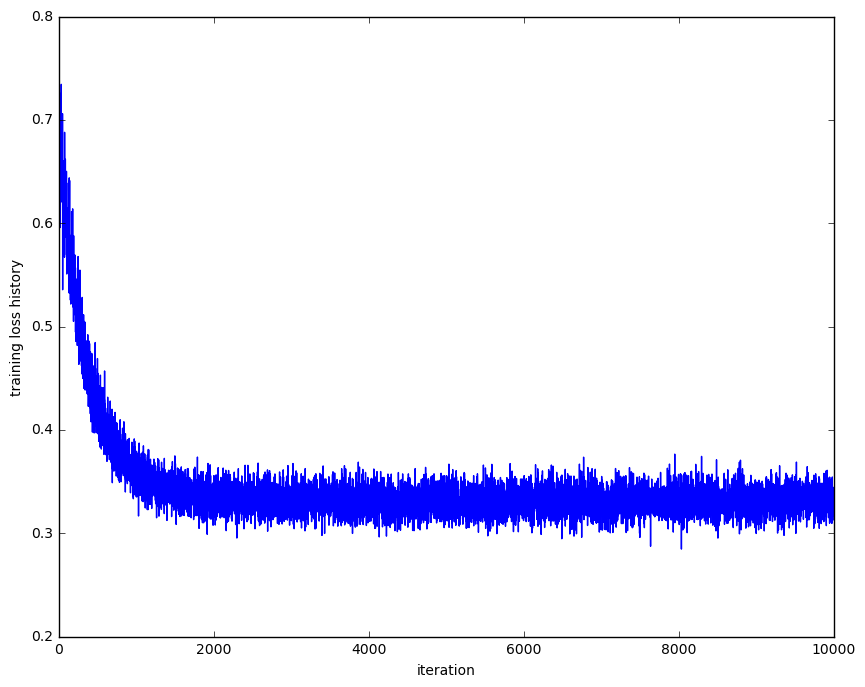

In [14]:
import math
data_size = 50000
X = np.random.ranf((data_size, 2)) * 2 - 1
y = np.zeros((data_size, 1))
for i in xrange(data_size):
    #y[i] = 2 * X[i, 0] - 1 * X[i, 1]
    y[i] = 0.5 * math.pi * (X[i, 0] ** 2) * math.sin(2 * math.pi * X[i, 1])
print y
# split to train and validation set
X_train = X[:(int)(0.8 * X.shape[0])]
X_val  = X[(int)(0.8 * X.shape[0]):]
y_train = y[:(int)(0.8 * y.shape[0])]
y_val = y[(int)(0.8 * y.shape[0]):]

net = NonLinearNet(2, 60, 1, std=1e-2)
net.forward(X)
loss_history = net.train(X, y, X_val, y_val,
            learning_rate=1e-1, reg=0.001,
            num_iters=10000, verbose=False)

# plot the loss history
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('training loss history')
plt.show()